In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as s

## Heatmaps of main results

In [4]:
resultsfile = '../results/holdout_Bact_results.csv'
df = pd.read_csv(resultsfile)

df.drop(columns= [ 'pool label', 'pool tax group'], inplace =True)
df.rename(columns = {'label tax group':'tax', 'positive label':'label','training group': 'training_group' }, inplace=True)
concat_ds = lambda row: f'{row["virus holdout group"]}_{row["label"]}_{row["training_group"]}'
df['Dataset']= df.apply(concat_ds , axis=1)
tax_order =['kingdom','phylum','class','order','family','genus','species']
df['tax'] = df['tax'].astype('category')
df['tax'].cat.set_categories(tax_order, inplace=True)
fs = lambda row: f'{row["Features"]}_{row["k"]}'
df['Feature set'] = df.apply(fs,axis = 1)
fs_order =['DNA_2','DNA_6','DNA_9','AA_3','AA_4','PC_5','PC_6','Domains_0']
df['Feature set'] = df['Feature set'].astype('category')
df['Feature set'].cat.set_categories(fs_order, inplace=True)

df.head()

In [7]:
df.sort_values(by = ['tax','label'],inplace=True)
unique =[]
[unique.append(ds) for ds in(list(df['Dataset']))if ds not in unique ]

dfp = df.pivot('Dataset', 'Feature set', 'AUC').reindex(unique)
dfp.head()

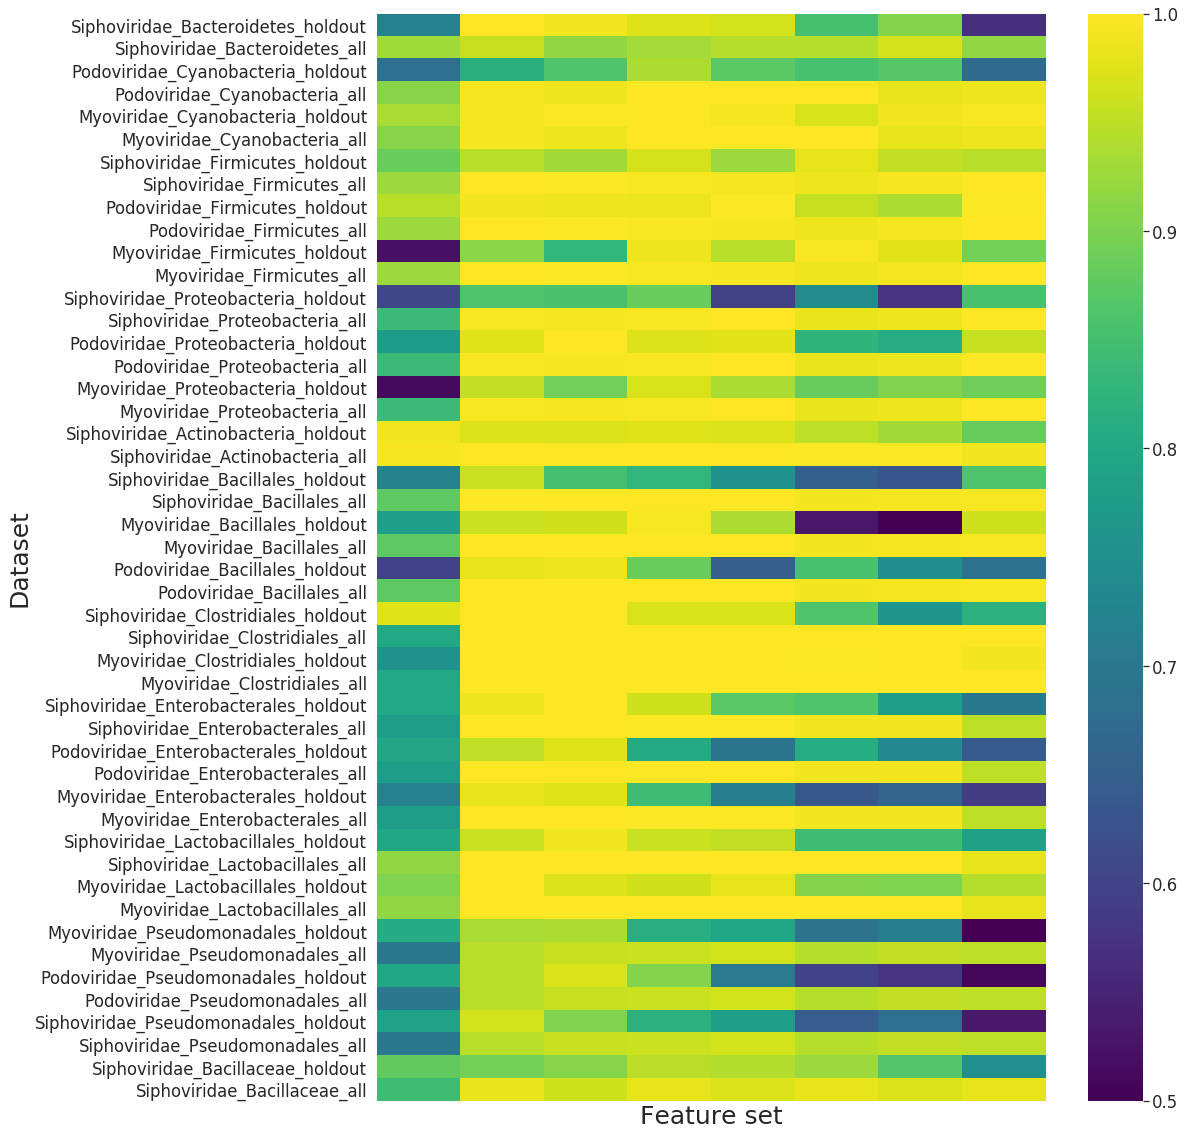

In [9]:
sns.set(font_scale=1.5, palette = 'viridis')
f, ax = plt.subplots(figsize=(15, 20))
plt.xticks(rotation='vertical')
ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    top=False,      # ticks along the bottom edge are off
     bottom=False,         # ticks along the top edge are off
    labelbottom=False
    )
ax.set_ylabel(ax.get_ylabel(), fontsize=25)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)
sns.heatmap(dfp,cmap = 'viridis', vmin = 0.5,   ax=ax)

### Re-arrange  df to have a  ho_AUC and all_AUC and ratio/all for each dataset

In [11]:
ho_df = df[df.training_group=='holdout']
ho_df = ho_df.rename(columns={'AUC':'ho_AUC'})
ho_df = ho_df[['Dataset','Feature set','tax','ho_AUC']]
ho_df['Dataset']= ho_df.apply( lambda row: row['Dataset'][:-8] , axis=1)

all_df = df[df.training_group=='all']
all_df = all_df.rename(columns={'AUC':'all_AUC'})
all_df = all_df[['Dataset','Feature set','tax','all_AUC']]
all_df['Dataset']= all_df.apply( lambda row: row['Dataset'][:-4] , axis=1)

ratios_df = pd.merge(all_df,ho_df, on= ['Dataset','Feature set','tax'])
ratios_df['ratios']= ratios_df.apply( lambda row:  row['ho_AUC']/row['all_AUC']  , axis=1)
ratios_df.head()

,Dataset,Feature set,tax,all_AUC,ho_AUC,ratios
0,Siphoviridae_Bacteroidetes,DNA_2,phylum,0.928,0.717,0.772629
1,Siphoviridae_Bacteroidetes,DNA_6,phylum,0.956,1.000,1.046025
2,Siphoviridae_Bacteroidetes,DNA_9,phylum,0.917,0.992,1.081788
3,Siphoviridae_Bacteroidetes,AA_3,phylum,0.933,0.973,1.042872
4,Siphoviridae_Bacteroidetes,AA_4,phylum,0.944,0.965,1.022246


In [12]:
ds=  lambda row:  f'{row ["Dataset"].split("_")[1]}_{row ["Dataset"].split("_")[0]}' 
ratios_df['DS'] = ratios_df.apply (ds, axis =1)                       

In [13]:
unique1 =[ f'{s.split("_")[1]}_{s.split("_")[0]}' for s in unique ]
unique2 =[]
[unique2.append(ds) for ds in unique1 if ds not in unique2 ]
(unique2.sort())
df_heatmap = ratios_df.pivot('DS','Feature set', 'ratios').reindex(unique2)


Text(58.2344,0.5,'Dataset')

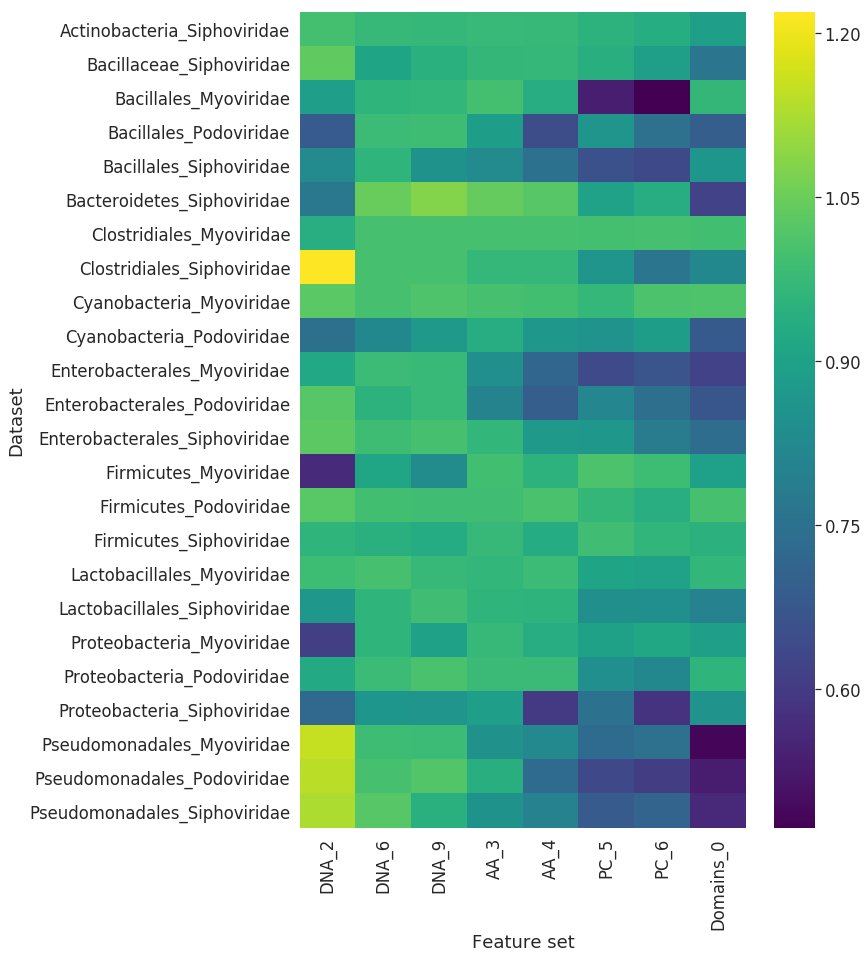

In [14]:
f, ax = plt.subplots(figsize=(10, 15))
sns.heatmap(df_heatmap,cmap = 'viridis',  ax=ax) 
plt.ylabel ( 'Dataset' )

In [15]:
ratios_df['Feature set'].cat.set_categories(fs_order, inplace=True)

/home4/youn01f/Desktop/workspace/myenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Ratio AUC_ho: AUC_all')

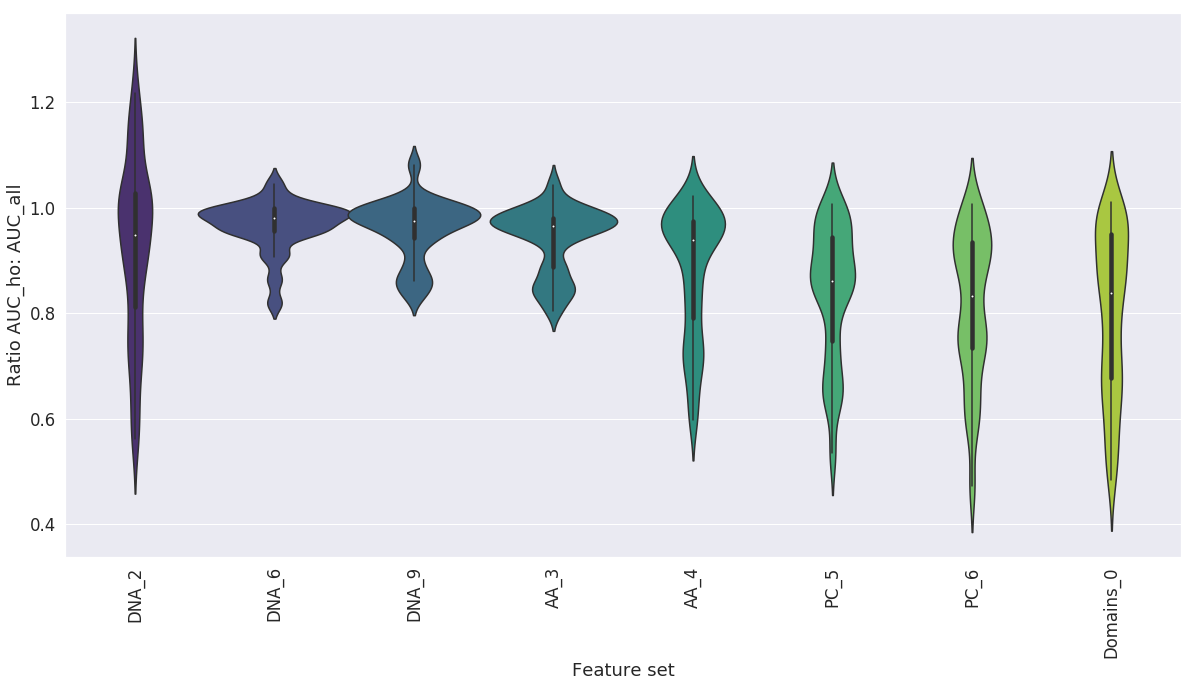

In [16]:
g, ax = plt.subplots(figsize=(20, 10))
#
f = sns.violinplot( x = 'Feature set', y ='ratios',  palette = 'viridis',width = 1.1,bw = .3,
                ax =ax, data = ratios_df)
plt.xticks(rotation='vertical')
plt.ylabel ( 'Ratio AUC_ho: AUC_all' )
